In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- Which music styles are present in the collection? Plot distribution. 
- - As the model predictions are activations, you need to decide what you consider as the final music style prediction for a track. If you want to consider the possibility of multiple styles per track, define some threshold for activation values. Otherwise, if you want to have a single music style per track, use the one with the maximum activation.
- - We have 400 values which may be a challenge to fit in a compact plot. Predicted styles have a parent broad genre category (all style tags have a format `genre—style`). Therefore you can instead report distribution for parent broad genres. In any case, also provide full results as a separate TSV file (similar to how we report genre distribution in MTG-Jamendo).


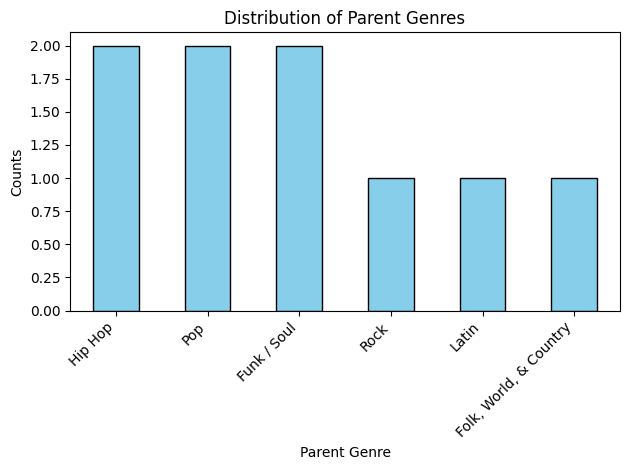

Counts of parent genres:
Hip Hop                   2
Pop                       2
Funk / Soul               2
Rock                      1
Latin                     1
Folk, World, & Country    1
Name: count, dtype: int64


In [34]:
genre_data = pd.read_pickle("descriptors/400-genre-activations.pkl")
discogs_df = pd.DataFrame(genre_data)


# Find column name with max value in each row
# discard last column as it contains filepath
max_column_per_row = discogs_df.loc[:, discogs_df.columns[:-1]].idxmax(axis='columns')

# Create a DataFrame with the counts and column name
distribution_counts_df = pd.DataFrame({'Genre': max_column_per_row.value_counts().index, 'Count': max_column_per_row.value_counts().values})

# Save the DataFrame to a TSV file with column names
distribution_counts_df.to_csv('metadata/genre-distribution_counts.tsv', sep='\t', index=False)

# Counting only parent genre divided by "--"
parent_genre_counts = max_column_per_row.apply(lambda x: x.split('---')[0]).value_counts()

# Plot the bar chart
ax = parent_genre_counts.plot(kind="bar", color='skyblue', edgecolor='black')

# Set labels and title
ax.set_xlabel('Parent Genre')
ax.set_ylabel('Counts')
ax.set_title('Distribution of Parent Genres')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Counts of parent genres:")
print(parent_genre_counts)



In [33]:
descr_data = pd.read_pickle("descriptors/descriptors-but-genre-v4.pkl")
descriptors_df = pd.DataFrame(descr_data)

descriptors_df.head(10)

,file_path,loudness,tempo,voice_instrumental,danceability,valence_arousal,keyscale_edma,keyscale_krumhansl,keyscale_temperly
0,audio/audio.000/3t/3tJjZMHLqhD8DaGgdBICnc.mp3,-11.269575,73,0.028792,0.063189,"(4.286968231201172, 4.7023024559021)","(Bb, major, 0.8111625909805298)","(Bb, major, 0.8881677389144897)","(Bb, major, 0.9318953156471252)"
1,audio/audio.000/1y/1yBlGMHFJyX17LwHkK3PZx.mp3,-6.745553,137,0.005805,0.805848,"(4.780598163604736, 5.73163366317749)","(G, major, 0.7730796337127686)","(G, major, 0.8081822395324707)","(G, major, 0.8007868528366089)"
2,audio/audio.000/1O/1OktQ1H9jADAQ3cp0nTsZa.mp3,-10.703255,88,0.109142,0.955855,"(4.8053412437438965, 5.070318698883057)","(E, minor, 0.9335876107215881)","(E, minor, 0.869731605052948)","(E, minor, 0.7378385066986084)"
3,audio/audio.000/3v/3v9P4gIW7qO6MJ3MouOIm6.mp3,-15.661302,172,0.970912,0.016740,"(5.51930046081543, 4.9464850425720215)","(A, minor, 0.7856190800666809)","(A, minor, 0.8837360739707947)","(A, minor, 0.8150748610496521)"
4,audio/audio.000/3f/3f4WsXZ3olC6tZ7DPPEQod.mp3,-12.913337,105,0.085076,0.201750,"(6.341944694519043, 5.704555034637451)","(D, major, 0.8111568093299866)","(D, major, 0.8227943181991577)","(G, major, 0.8814902901649475)"
5,audio/audio.000/3f/3f8PxjyzGScfVlfYPXCLSP.mp3,-12.520756,101,0.800842,0.850290,"(5.349573135375977, 4.762848377227783)","(F, major, 0.8416576385498047)","(F, major, 0.8966881632804871)","(F, major, 0.8837176561355591)"
6,audio/audio.000/5X/5X3qms1gjHRd12mZaJYIpF.mp3,-9.838338,96,0.561613,0.996699,"(5.039830207824707, 4.90536642074585)","(F, major, 0.8681960105895996)","(F, major, 0.86176997423172)","(F, major, 0.7901792526245117)"
7,audio/audio.000/75/75e3qi96Sej2KFarPhPXLH.mp3,-13.107552,88,0.343975,0.050772,"(5.559749603271484, 4.7562456130981445)","(D, major, 0.8939815163612366)","(D, major, 0.8840577006340027)","(D, major, 0.8141620755195618)"
8,audio/audio.000/2k/2k2RPHMeyercU9PauiKNbU.mp3,-7.436169,153,0.005225,0.999468,"(5.80603551864624, 6.601707458496094)","(F, major, 0.8197178840637207)","(F, major, 0.7628012895584106)","(F, minor, 0.5939420461654663)"


- How fast and danceable is the music? Plot tempo and danceability distribution.


In [ ]:

plt.hist(descriptors_df['tempo'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of BPM Data')
plt.xlabel('Beats per minute')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.hist(descriptors_df['danceability'], color='red', edgecolor='black', bins=20)
plt.title('Danceability')
plt.xlabel('Is danceable')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- How is music represented in terms of arousal/valence emotion space? Plot a 2D distribution.


In [ ]:
arousal = descriptors_df['valence_arousal'].apply(lambda x: x[0])
valence = descriptors_df['valence_arousal'].apply(lambda x: x[1])
joint_plot = sns.jointplot(x=arousal, y=valence, kind='hex', color='skyblue')
joint_plot.set_axis_labels('Valence', 'Arousal', fontsize=11)
plt.show()

- What about loudness? Plot integrated loudness LUFS distribution.


In [ ]:
plt.hist(descriptors_df['loudness'], color='green', edgecolor='black', bins=20)
plt.title('Integrated LUFS Loudness Distribution')
plt.xlabel('Loudness')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

- Which keys/scales are used in the collection? Plot distribution according to the three profiles we used.


In [ ]:
profiles = ["keyscale_edma", "keyscale_temperly", "keyscale_krumhansl"]

for key_profile in profiles:
    profile_counts = descriptors_df[key_profile].apply(lambda x: (x[0],x[1]) ).value_counts()

    profile_counts.plot(kind='bar')
    plt.xlabel(f'Key Profile: {key_profile}')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)  
    plt.title(f'Distribution for {key_profile}')
    plt.tight_layout()  # Ensures all elements are properly spaced
    plt.show()


- How much of the music is vocal vs instrumental? 


In [ ]:

plt.hist(descriptors_df['voice_instrumental'], color='skyblue', edgecolor='black', bins=20)
plt.title('Distribution of Vocal-Instrumental Data')
plt.xlabel('Is Instrumental')
plt.ylabel('Counts')
plt.grid(True)
plt.tight_layout()
plt.show()
